In [ ]:
#pip install fastbook

In [15]:
# 5.3이전까지
from fastai.vision.all import *
from fastbook import *
import ipywidgets as widgets

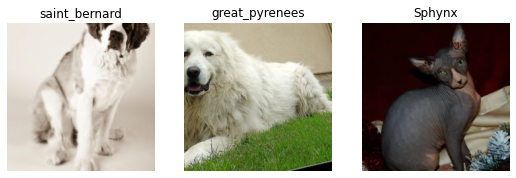

In [1]:
path= untar_data(URLs.PETS)

pets= DataBlock(blocks= (ImageBlock, CategoryBlock),
                get_items= get_image_files,
                splitter= RandomSplitter(seed= 42),
                get_y= using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                item_tfms= Resize(460),
                batch_tfms= aug_transforms(size=224, min_scale=0.75))
dls= pets.dataloaders(path/"images")

dls.show_batch(nrows=1, ncols=3)

In [3]:
pets.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_101.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=480x360
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_101.jpg
    applying partial gives
      Egyptian_Mau
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(5)

Final sample: (PILImage mode=RGB size=480x360, TensorCategory(5))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up afte

In [4]:
learn= vision_learner(dls, resnet34, metrics= error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.523003,0.351285,0.102842,01:17


epoch,train_loss,valid_loss,error_rate,time
0,0.484185,0.318955,0.098106,01:21
1,0.293839,0.236814,0.063599,01:22


### 학습결과
#### 각 열은 학습용 및 검증용 데이터셋에서의 '평균 손실 정보'와 '요청한 평가지표'를 포함하고 있다.
##### 요청한 평가지표: 에러율(error_rate)
#### 지금까지 우리가 놓친게 있다면...?
### **"손실함수"**
#### 모델 파라미터를 최적화하는데 사용하는 이 함수 유형을, 우리는 지금까지 명시해본 적이 없다. 
#### fastai는 사용중인 데이터와 모델의 종류에 따라 적절한 손실 함수를 고른다.
##### (아마도, untar_data(URLs.데이터) 사용할 때나, 데이터블럭 설정할 때나, 데이터로더를 사용할 때, 각종 learner메소드를 사용할 때 손실 함수를 결정하는 듯 하다.)
#### 여기서는 이미지 데이터를 입력받아서 범주형 출력을 내놓으므로, 기본적으로 **"교차 엔트로피 손실"**을 선택한다.

# 5.3 교차 엔트로피 손실
### 교차 엔트로피 손실
#### - 앞 장에서 사용되던 손실 함수와 유사하다.
#### - 차이점 1) 종속 변수(y; 예측값)에 범주가 둘 이상이라도 작동한다.
##### |_> 1장 기준으로 손실함수는 p와 1-p 형태의 모 아니면 도 식 손실을 측정했다.
#### - 차이점 2) 더 빠르고 안정적인 학습 결과를 도출한다.

# 5.3.1 활성 및 레이블 확인
##### * 교차 엔트로피 손실의 작동 방식을 이해하려면, 실제 데이터 및 활성을 바라보는 방식을 이해해야만 한다.
#### 모델의 활성(feature?)을 살펴보도록 하자.

In [5]:
x, y= dls.one_batch()

In [6]:
x

TensorImage([[[[ 1.1338,  1.1225,  1.1087,  ...,  0.6313,  0.5498,  0.3413],
               [ 1.1001,  1.0846,  1.0670,  ...,  0.5699,  0.5195,  0.4394],
               [ 1.0512,  1.0358,  1.0220,  ...,  0.6080,  0.6189,  0.6233],
               ...,
               [ 2.2489,  2.2489,  2.2489,  ...,  2.1037,  2.1082,  2.1258],
               [ 2.2041,  2.2297,  2.2489,  ...,  2.0598,  2.0718,  2.0837],
               [ 2.0993,  2.1686,  2.2241,  ...,  2.0404,  2.0547,  2.0761]],

              [[ 0.2507,  0.2419,  0.2311,  ...,  0.0914,  0.0231, -0.1666],
               [ 0.2244,  0.2123,  0.1984,  ...,  0.0311, -0.0146, -0.0870],
               [ 0.1860,  0.1738,  0.1628,  ...,  0.0676,  0.0762,  0.0781],
               ...,
               [ 1.7804,  1.7907,  1.8097,  ...,  1.2045,  1.2032,  1.2038],
               [ 1.8120,  1.8848,  1.9663,  ...,  1.2040,  1.1948,  1.1875],
               [ 1.6773,  1.7633,  1.8689,  ...,  1.2156,  1.1959,  1.1847]],

              [[-0.2017, -0.2098

#### 보아하니 x는 이미지 데이터의 활성(feature?)를 나타낸다.

In [7]:
y

TensorCategory([ 3, 18, 36, 19, 14,  5,  9, 14, 20, 14, 16, 36, 22, 28, 17,  2,
                33, 33, 28, 29, 10, 16,  1, 20,  6, 28, 35, 11, 13, 20, 25, 31,
                20, 26, 11, 24, 26, 21,  1,  5, 29, 15, 25, 22, 24, 28,  4, 12,
                 8, 30, 32,  2,  5, 13, 18, 35, 19, 35, 36,  4, 34, 13, 28,  2],
               device='cuda:0')

#### 보아하니 y는 범주(label?)를 나타낸다.

### .one_batch()
#### * 종속 변수와 독립 변수를 '미니배치' 형태로 반환한다.
#### ** batch 크기가 64이므로, 해당 텐서는 행이 64개이다.
#### *** 각 행의 값은 0~36 사이의 정수 이다. ==> 37종의 품종

In [8]:
preds, _= learn.get_preds(dl=[(x, y)])
preds[0]

TensorBase([1.1529e-03, 4.3501e-04, 5.6352e-06, 9.9669e-01, 1.5607e-04,
            5.9005e-05, 4.5124e-05, 6.4699e-06, 6.3560e-06, 7.3362e-04,
            4.2377e-05, 2.2658e-05, 2.7357e-07, 6.7831e-06, 1.7723e-05,
            5.2842e-05, 2.6405e-06, 2.9359e-05, 2.2242e-05, 1.4082e-06,
            2.0955e-05, 3.7461e-07, 1.4902e-06, 2.6548e-07, 1.0590e-05,
            7.3502e-07, 6.7450e-05, 1.0862e-05, 3.7349e-06, 5.6826e-05,
            1.4630e-06, 5.1743e-06, 2.9223e-04, 9.5675e-07, 2.7374e-05,
            1.6057e-06, 1.0481e-05])

### .get_preds(dl=[(x,y)])
#### * .get_preds()는 예측값(신경망 마지막 계층의 활성)을 확인할 수 있다.
#### ** 이 메소드는 데이터셋의 색인 번호(0은 학습용, 1은 검증용 데이터셋) 또는 배치 형식의 반복자를 입력받는다. 따라서, dl=[(x, y)]는 배치 형식의 반복자를 입력받았음을 의미한다.
#### *** 출력된 예측값을 분석해보면, 예측은 0~1 범위의 확률 37개로 구성됨을 알 수 있다. 그리고, 이 값들 37개를 모두 더하면 1이 되어야 한다.

In [10]:
len(preds[0]), preds[0].sum()

(37, TensorBase(1.))

### 크로스 엔트로피 손실 내부적으로는
#### sofmax 활성화 함수를 적용해서 모델이 내놓은 활성을 이런 형식의 출력으로 변형한다.

# 5.3.2 소프트맥스
### 분류 모델에서는
#### '마지막 계층'의 모든 활성값이 0~1이 되도록 조정(정규화)하고, 모두 더하면 1이 되도록 만들기 위해 소프트 맥스 활성화 함수를 사용한다.
#### !! 소프트맥스는 앞 장에서 본 '시그모이드 함수'와 유사하다. !!
##### ((p.227)FastAI 4장 4.5.1시그모이드 참고)

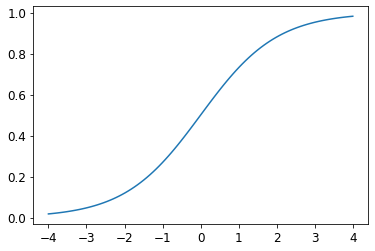

In [17]:
plot_function(torch.sigmoid, min=-4, max=4)

### 이 시그모이드 함수를 신경망의 활성값으로 채운경우
#### **'단일 열에 적용하면'** 0과 1 사이의 숫자로 채워진 열을 만들 수 있다.
##### (시그모이드 함수의 특성을 이용)
#### 따라서, 마지막 계층에서 매우 유용한 '활성화 함수'이다.

### 그런데, !! 이번에는 Yes, No 문제가 아니다 !!
#### 범주가 "더 많은 타깃이 필요할 때" 일어날 일을 생각해보자.(37개의 품종 구별)
##### (...각 행의 값은 0~36 사이의 정수 이다. ==> 37종의 품종...)
#### 따라서, 이번에는 단일 열보다 더 많은 활성이 필요하다는 의미이다.
##### (... 그러니까,,, 다중 열??)
### 햇갈리니까, 우리가 기억해야할 **가장 기초적인 내용**과, **4장**에서 3과 7을 예측하던 때를 **복기**해보자.

### ** 가장 기초적인 내용 **
#### y = w*x + b [ 예측값 = 가중치 * 학습데이터 + 편향 ]
##### 혹은
#### y = b0 + b1*x1 + b2*x2 + b3*x3 + ... + bn*xn [ 예측값 = 가중치0 + 가중치1*학습데이터1 + 가중치2*학습데이터2 + ... + 가중치n*학습데이터n ;선형 회귀 ]
#### 우리는 "미지수 = 미지수 * 미지수 + 미지수" 를 계산해야 한다.
#### 우리가 구해야 하는 것은 답(y, 해)가 아니라 함수 그 자체이다.
#### 우리는 미술 대학의 조각가 지망생과 같다. "가중치라는 대리석(b혹은 w)"에 "학습데이터라(x)는 조각 도구"를 손에 쥐고 한 번, 두 번 내리 치면서 대리석을 깎아 나간다. 그리고, 대리석을 깎아 나가다가, 옆에 똑같이 만들어야할 "과제 조각상과 비교"를 하고, "앞으로 깎아내야할 부분을 고려"해서 "다시 조심스레 깎아 나간다".

### **4장에서...**
#### 1) 우리는 MNIST 데이터셋에서 3과 7을 구별하는 예제를 진행했었다.
#### 2) MNIST 데이터셋의 개별 데이터 내용이 어떻게 이루어졌는지 확인하고, 이미지의 rgb를 **텐서화**했다.(흑백이여서 R,G,B별로 나눌 필요는 없었지만...) **-> train 데이터(조각도구)** 확보
#### 3) 그리고, 텐서들을 쌓아올려(torch.stack()) 평균(tensor.mean())을 구해, 3과 7의 **이상적인 형태**를 도출해냈다.**-> ideal(label) 데이터(과제 조각상)** 확보
#### 4) 모델을 선정한다. **-> 가중치(대리석)**확보
#### 5) 예측을 진행한다. **-> 조각 시작(가중치 x train 데이터)**
#### 6) 그리고나서, 예측이 **얼마나 어긋나있는지** 확인했다. **-> 손실 측정**
##### - 과제 조각상과 지금 깎고 있는 대리석 **비교**(가중치 x train 데이터)
#### 7) feedback이 필요하다. **-> 손실함수 사용; 미분**
##### - 과제 조각상처럼 깎으려면 **어떻게 해야할지 고민하는 과정**
##### - 가장 기초적인 미분(일반적인 기울기 구하기): (y_new - y_old) / (x_new - x_old)
##### - 4장에서는 3과 7만 구분하면 되므로, 3일 확률(거리)만 계산하고, 7은 1-3일 확률로 구했다. 그리고, 이때, 두 확률의 합이 1임을 강제하기 위해 **sigmoid함수를 손실함수로써 사용하였다.(!! sigmoid함수는 x는 무한, y는 0 ~ 1 사이의 값을 도출해낸다. !!)**
##### - **sigmoid함수의 도출 특성(0 ~ 1) 때문에, 0.5보다 낮으면 3으로 추측했다.**
##### - **따라서, 예측값을 확인해보면...(p.231)**
##### >> preds
##### tensor([[-11.1002],
##### .............[...5.9263],
##### .............[...9.9627],
##### .............[..-8.1484]], grad_fn=<AddBackward0>)

#### 그렇다면, 이제 우리는 5.3.2 초반부 "sigmoid함수의 단일 열에 적용하면"이라는 문장의 의미를 이해할 수 있다.
### !! 하지만 !!
#### 이번에는 범주가 더 많은 타깃이 필요할 때를 생각해보아야 한다. 즉, 단일 열보다 더 많은 활성이 필요하다는 의미로, 범주당 활성 하나가 필요하다.
##### (결론은 4장에서 n행 1열 형태였다면, 5장에선 n행 n열 형태가 되어야 한다는 것이다.)
#### 4장의 예를 다시 생각해보자. 3과 7을 구별하는, 실상은 3인지 아닌지를 확인하는 문제였다. 5장에서는 3과 7을 단순히 구별하는 것을 넘어 각각을 예측하는 문제가 되어야 한다. 그렇기 때문에, 활성을 2개 출력하는 신경망을 만들어야한다.
##### 아래는 신경망 자체를 만들지는 않고, 단순 예제를 활용하도록한다.

In [18]:
acts= torch.randn((6, 2))*2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

#### 활성을 2개 출력한다 == 2개의 열을 출력한다.
### sigmoid함수를 적용해 보겠다.

In [19]:
acts.sigmoid()

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

### 과연, 위 출력 결과는 올바른 결과일까? !! NO !!
#### acts의 출력값에서 둘의 확률의 합이 1이 되는지 잘 살펴봐라. 오히려 음수 마저 존재한다.
### 그렇다면, 어떻게 해야 올바른 sigmoid 결과를 도출해낼 수 있을까?
### 다시 한번 생각해보자,
#### 지금 우리는 1장에서 그저 따라 썼던 "이진 분류"를 구현하려는 것과 똑같다.
#### 그리고, 활성 쌍(두 활성)은 단순히 입력이 7과 3이 될 '상대적인 가능성'을 표현한 것이다. 이 두 값이 절대적으로 큰지 작은지보다, "둘 중 어느 값이 더 큰지"가 더 중요하다.
#### 여기서, 두 값이 상대적인 가능성이라는데에 주목하자, 이 특성을 활용해서, 우선 "두 활성 간의 차이"로 부터 입력이 7이 아닌 3이라고 "얼마나 확신 할 수 있는지"를 구한다. 그리고 그 차이에 시그모이드 함수를 씌워보도록하자. 

In [20]:
(acts[:, 0]-acts[:,1]).sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

#### 바로 윗 단에서 거창하게 설명한 것 치곤, 4장과 다를게 뭐냐고 할 수 있다.
### 하지만, 잘 생각해 보도록 하자.
#### 4장에서는 3일 확률을 구하는데 sigmoid함수를 사용했다.
#### 그렇지만, 이번 5장에선, 3일 확률과 7일 확률 모두 구했다. 그리고나서, 두 확률의 차이를 구하고, sigmoid 함수를 적용했다. 즉, "확률들 중에서 하나의 확률을 결정할 수 있도록 제안한 것"이다.
### 이와 같은 역할을 하는 함수가 바로 **!! "softmax" !!**이다.

In [21]:
# softmax 함수의 수학적 정의
def softmax(x): return exp(x) / exp(x).sum(dim=1, keepdim= True)

In [22]:
sm_acts= torch.softmax(acts, dim=1)
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

### 간단히 생각해서, 소프트맥스 == 시그모이드_다중 범주.ver
##### .
#### 소프트맥스 함수를 사용하는 경우는?
##### * 범주가 둘 이상 일때,
##### ** 각 범주의 확률의 합이 1이 되어야 하는 상황에서는 언제나 사용할 수 있다.
##### *** 단지 두 범주만 있을 때도 일고나성을 유지할 목적으로 많이 사용한다.
##### .
#### 소프트맥스 함수의 특성을 정리해보자면?
##### * 지수 함수로 모든 숫자를 양수화
##### ** 양수화된 값들을 합한 값으로 각 숫자를 나누면, 더했을 때 1이 되는 숫자가 여럿 생긴다.
##### *** 지수 함수는 !! "여러 활성값 중 하나가 다른 값보다 조금만 더 크더라도 그 값을 증폭" !!시키는 좋은 속성이 있다.
##### **** 증폭 == 1과 가까워진다.
##### .
#### 소프트맥스 함수의 실질적인 역할은?
##### * 범주들 가운데 !! 하나를 고르는 것 !!.

### 교차 엔트로피 손실은 두 부분으로 구성된다. 첫 번째는 소프트맥스이고, 두 번쨰는 로그 가능도 이다.